<a href="https://colab.research.google.com/github/arthurzx22aa/Projeto_Sinais_e_sistemas/blob/main/projetode_sinais_e_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Projeto de Sinais e Sistemas - Reconhecedor de Sons: Pets</h1>
Universidade Federal de Pernambuco - UFPE |
Centro de Informática - CIn <br/>
Curso de Engenharia da Computação <br/>
Disciplina: ES413 - Sinais e Sistemas | Projeto - 2023.2 <br/>
Alunos:<br/>
Arthur Thierre (atss) <br/>
Juliana Serafim (jss4) <br/>
Rômulo Andrade (raasa) <br/>


## Introdução

O objetivo do projeto da disciplina é construir e apresentar, a partir de sinais de áudio, um modelo para reconhecimento de alguma categoria de sons, sendo atendidas as especificações requisitadas.

**Motivação tema escolhido**<br/>

Segundo o SEBRAE, desde 2022 o mercado de pets no Brasil arrecada mais de R$ 40 bilhões por ano.

Dentro desse mercado emergente surge a **oportunidade de inovação** com a proposta do grupo de criar um **modelo de reconhecimento de comando sonoros dos animais de estimação para ativar um alimentador automático**.

Dessa forma, o grupo desenvolve neste arquivo um **modelo de reconhecimento de sons de pets** para ser a base de ativação da proposta de criar um alimentador automático por input do próprio pet.

## Data Collection

O banco de dados escolhido é o E-50, no qual foi segmentado em alguns casos para teste de acurácia do modelo:


1.   **Database Geral**: arquivos de sons de vários animais na pasta `Pet` e arquivos de outros fenômenos sonoros incluídos no E-50 na pasta `Others`
2.   **Database Gato e Cachorro**: uma pasta `Pet` com 40 áudios de gatos e 40 áudios de cachorros e uma pasta `No Pets` com 80 áudios de outra natureza escolhidos aleatoriamente
3. **Database Cachorro**: uma pasta `Pet` com 40 áudios de cachorros e `No Pets` com 40 áudios de outro tipo escolhidos aleatoriamente
4. **Database Gato**: análogo ao banco de dados anterior porém com os 40 áudios de gatos

A necessidade e a implementação dessa forma segmentada do banco de dados surgiu a partir do desenvolvimento do projeto, no qual à medida que foi levantada as hipotéses para melhoria do modelo, elas eram implementadas. Dessa forma, não há uma parte especifica do código para criação ou segmentação desses bancos de dados, uma vez que essa criação foi feita manualmente a partir da classificação das pastas do banco de dados fonte `E-50`.

Além disso, pelos áudios do banco de dados `E-50` já estarem tratados **não houve necessidade de fazer pré-processamento de dados para nosso modelo**.

## Extratores


A medida em que desenvolvemos e colhemos os resultados do projeto, fomos alterando ou o banco de dados ou os extratores utilizados para melhoria da acurácia e assim se ter um modelo satisfatório.

Desse modo, ao decorrer do projeto usamos os seguintes extratores:


1.   Abordagem com Transformada Rápida de Fourier combinada:

*   Fast Fourier Transform (FFT)
*   Root Mean Square Energy - RMS
* Zero Crossing Rate
* Mel-frequency cepstral coefficients (MFCCs)
* Spectral bandwidth


2.   Abordagem de comparação de extratores encontrados na literatura:



*   SFTF
*   Rasta - PLP
* GFCC






## Classificador

Em todas as abordagens do modelo foi usado o algoritmo **K-Nearest Neighbors (KNN) como classificador**.

Uma vez que divimos o banco de dados em Pets e No Pets, a metodologia do KNN faz sentido, pois o KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos, de modo que se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria.

Como temos apenas duas categorias há uma praticidade em usar o KNN.

## Modelo Final


A proposta final do grupo para o criar um modelo de reconhecimento de comando sonoros dos animais de estimação para ativar um alimentador automático se baseia nas seguintes premissas:


1.   A utilização de dois softwares:


*   Um com o reconhecedor de sons de gato, miado
*   Outro com o reconhecedor de sons de cachorro, latido

Essa divisão se dá pelas características do sinal de um miado e um latido serem muito diferentes, o latido apresenta picos no espectro da frequência enquanto o miado é mais longo no espectro de frequência, assim unir essas duas distintas características em uma só categoria diminuir a acurácia do modelo. Dessa forma que o modelo de reconhecimento de funciona melhor classificando sons de gatos e de cachorros separadamente.


2.   Reconhecedor de sons implementado com o extrator GFCC

O extrator GFCC adapta os coeficiente de MFCC usando a transformada de Greenwood de forma a considerar a frequência coclear para todas as espécies, isto é, a cóclea é um órgão responsável pela função auditiva, onde o som é convertido em sinais elétricos e enviado para o cérebro assim ela tem uma capacidade excecional para analisar o som, tanto em frequência como em intensidade e a frequência coclear é a faixa de frequência que cada espécie escuta.

Por essa adaptação o GFCC teve métricas melhores sendo o escolhido para a base do reconhecedor para o software do alimentador automático.



A seguir será mostrado como chegamos ao modelo final de reconhecedor do nosso projeto

#Primeira abordagem: FFT combinado

**Fast Fourier Transform (FFT)**:

Fast fourier transform é um algoritmo que determina a transformada discreta de fourier the algum sinal, mais rapido do que um calculo convencional.

**Root Mean Square Energy - RMS**:

O valor RMS é um conjunto de valores, de um sinal contínuo, é a raiz quadrada do somatório dos quadrados dos valores de uma função.

**Zero Crossing Rate**

É a taxa pela qual o sinal muda sinal (positivo/negativo). Tem como extrair informações sobre a frequência do sinal.

**Mel-frequency cepstral coefficients (MFCCs)**

O MFCC de é um sinal de aduio, é um pequeno conjunto de características, que descrevem a forma de onda espectral do sinal.

**Spectral bandwidth**

Está relacionada à largura da física da fenda e dispersão óptica do sistema monocromador.


### Importações

In [ ]:
#importações
%matplotlib inline
from pathlib import Path
import os
import numpy as np
import random
import sklearn as scikit_learn
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Funções para o código do FFT combinado

In [ ]:
# Extrator de features:
def get_features(x, sr):
    features = []

    #Root Mean Square Energy
    rms = librosa.feature.zero_crossing_rate(y=x)
    features.append(rms.mean())

    # Fast Fourier Transform
    fft = np.fft.fft(x)
    features.append(np.mean(np.abs(fft)))

    #Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y=x)
    features.append(zcr.mean())

    #Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=x, sr= sr)
    features.append(mfcc.mean())

    #Spectral bandwidth
    sr = librosa.feature.spectral_rolloff(y=x, sr= sr)
    features.append(sr.mean())

    return features

# Leitura e separacao dos arquivos das pastas:
def extract(audios, directory):
  X = []
  Y = []
  aux = []

  for audio in audios:

    path = directory+'/'+audio
    for audio_file in os.listdir(path):
        audio_path = path+'/'+audio_file
        y, sr = librosa.load(audio_path)
        aux.append([y, sr])

    # Escolhendo audios aleatorios
    random.shuffle(aux)
    for i in aux:
        X.append(get_features(i[0], i[1]))
        Y.append(audio)

  return X, Y


## Modelo FTT Combinado

In [ ]:
# Função para o modelo
def modelo_ftt_combinado(directory):
  X = []
  Y = []
  aux = []

  audios = os.listdir(directory)
  X, Y = extract(audios, directory)
  scaler = MinMaxScaler()
  scaler.fit(X)
  X = scaler.transform(X)
  X = np.array(X)
  Y = np.array(Y)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 20)
  knn_classifier = KNeighborsClassifier(n_neighbors=1)
  knn_classifier.fit(X_train, Y_train)
  Y_pred = knn_classifier.predict(X_test)
  conf_matrix = confusion_matrix(Y_test, Y_pred)
  acuracia = accuracy_score(Y_test, Y_pred)
  print("Acurácia FTT combinado:", acuracia)

  plot = plt.subplot()
  seaborn.heatmap(conf_matrix, cmap="Blues", annot=True, fmt='g', ax=plot)

  plot.set_title('Confusion Matrix')
  plot.set_xlabel('Predicted')
  plot.set_ylabel('True')
  plt.xticks(rotation=45, ha="right")
  plt.yticks(rotation=0, ha="right")
  plot.xaxis.set_ticklabels(audios)
  plot.yaxis.set_ticklabels(audios)

  plt.show()
  return acuracia


### Resultados do Modelo

Acurácia FTT combinado: 0.8071748878923767


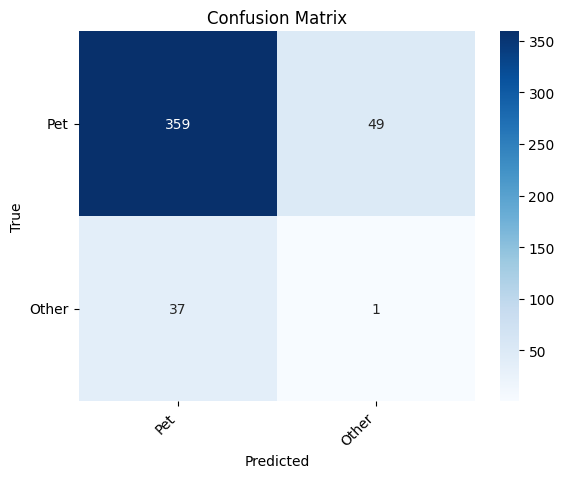

Acurácia FTT combinado: 0.4166666666666667


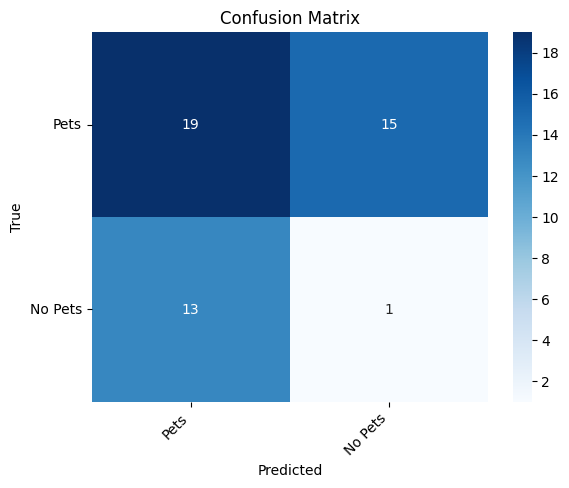

In [ ]:
metricas_ftt = []
database_geral = './ESC-50';
database_gato_e_cachorro = './databaseamplo';

#Tambem se pode testar o modelo de reconhecedor ftt combinado para gatos e cachorros separadamente versus audios de sons aleatorios
#database_cachorro= './database';
#database_gato = './databasegatos';

database_geral_fft =  modelo_ftt_combinado(database_geral)
database_gato_e_cachorro_fft = modelo_ftt_combinado(database_gato_e_cachorro)

**Análise de Resultados**

1. Utilizando o Database Gato e Cachorro, database_gato_e_cachorro_fft, somente áudios de gato e cachorro na pasta `Pet`

Com pouco menos de 40% de acurácia, nossa primeira abordagem enfrentou problemas devido a alguns fatores:
o reconhecer de sinais não é eficiente para sons de animais;
Baixa quantidade de dados nos inputs;
Buscamos corrigir isso de duas formas:
Aumentando a quantidade de dados para treinamento, sendo eles de mais animais;
Utilização de outros extratores que buscamos em outras literaturas;

2. Utilizando o Database Geral, database_geral_fft, ou seja, aumento de animais na categoria pets

Aumento acurácia para quase 80%, usando os mesmo extratores da primeira abordagem, mas mudando os audios da nossa database, colocando apenas animais dentro do treinamento, e separando as categorias de Gato e Cachorro, que são os objetivos do projeto.

Aumento da quantidade de dados
Melhor exploração do conjunto de animais


# Abordagem comparação de Extratores

Segundo Sharma G., etc al, 2019, para classificação de áudios de animais dois extratores são recomendados GFFC e Rasta-PLP


 Referência: Garima Sharma, Kartikeyan Umapathy, Sridhar Krishnan. Trends in audio signal feature extraction methods, The Department of Electrical and Computer Engineering, Ryerson University, ON M5B 2K3, Canada.

### Extratores utilizados e seu funcionamento

**Short-Time Fourier Transfom (STFT)**

Esse extrator faz uma transformada de fourier “mais lenta”, pois ela separa o sinal em vários segmentos, e calculada a transformada de cada segmento individualmente.

**Rasta - PLP**

Aplica um filtro passa-banda à energia em cada sub-banda de frequência, a fim de suavizar o curto prazo variações de ruído e para remover qualquer deslocamento constante resultante da coloração espectral estática na fala sinal.

**Greenwood function cepstral coefficients (GFCC)**

É uma derivação da equação de Greenwood. Podem ser implementados com poucas informações, essencial com o mínimo e máximo do alcance da frequência.


### Bibliotecas

São usadas as mesmas bibliotecas da outra abordagem mas deixando as importações aqui caso se queira rodar essa abordagem sem a anterior.

In [ ]:
from os import listdir
from os.path import isdir, join
import os
import numpy as np
import librosa

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## Execução dessa abordagem

Temos as bases de dados explicadas no começo do notebook na seção de Data Collection para rodar a comparação dos extratores deve-se escolher qual database será usado e substituir na variável **diretorio_principal** da célula abaixo

Modo de uso para

database_geral => colar './ESC-50' em diretório principal
database_gato_e_cachorro => './databaseamplo'
database_cachorro=> './database'
database_gato => './databasegatos'

## Input do Database a ser comparado

Aqui as trocas de banco de dados sao feitas manualmente e para gerar o output de cada extrator rodar a celula do extrator correspondente, conforme explicado acima.

In [ ]:
diretorio_principal = './database' # aqui as trocas de banco de dados sao feitas manualmente e para gerar o output de cada extrator rodar a celula do extrator correspondente
diretorios = [a for a in listdir(diretorio_principal) if isdir(join(diretorio_principal, a))]

audios_classificados = []

for i in range(0, len(diretorios)):
  arquivo = listdir(join(diretorio_principal,diretorios[i]))

  for j in range(0, 40):
    caminho_audio = join(diretorio_principal,diretorios[i],arquivo[j])
    audios_classificados.append((caminho_audio,diretorios[i]))

## Inputs para os extratores


In [ ]:
audio_paths = []
y_stft = []
y_rasta_plp = []
y_gfcc = []

for k in range(0,len(audios_classificados)):
  audio_paths.append(audios_classificados[k][0])

for w in range(0,len(audios_classificados)):
  y_stft.append(audios_classificados[w][1])
  y_rasta_plp.append(audios_classificados[w][1])
  y_gfcc.append(audios_classificados[w][1])

max_length = 800

X_stft = []
X_rasta_plp = []
X_gfcc = []

for audio_path in audio_paths:
    # Carregamento dos áudios
    audio_data, _ = librosa.load(audio_path, sr=None)  # sr=None para preservar a taxa de amostragem original

    # Transformada de Fourier
    transformed_signal = np.abs(librosa.stft(audio_data))

    # Calcular os coeficientes de cochleagrama (uma versão do espectrograma não linear)
    cgram_features = librosa.cqt(audio_data, sr=_, n_bins=64)

    # Adicionar uma pequena constante antes de calcular o logaritmo
    cgram_features = cgram_features + 1e-10

    # Calcular os coeficientes GFCC a partir do cochleagrama
    gfcc_features = librosa.feature.mfcc(S=librosa.power_to_db(np.abs(cgram_features)**2), n_mfcc=13)

    # Extração características PLP
    plp_features = librosa.feature.melspectrogram(y=audio_data, sr=_)  # Calcula o espectrograma mel
    plp_features = librosa.feature.mfcc(S=librosa.power_to_db(plp_features), n_mfcc=13)  # Calcula os coeficientes MFCC
    plp_features = librosa.feature.delta(plp_features)  # Calcula as derivadas dos coeficientes MFCC

    # Transformação RASTA
    diff = np.diff(plp_features, axis=1)
    diff = np.concatenate([np.zeros((diff.shape[0], 1)), diff], axis=1)  # Adiciona uma coluna de zeros no início
    rasta_plp_features = plp_features - 0.94 * diff  # Aplica a transformação RASTA

    # Redimensão dos vetores
    if transformed_signal.shape[1] < max_length:
        transformed_signal = np.pad(transformed_signal, ((0, 0), (0, max_length - transformed_signal.shape[1])), mode='constant')
    else:
        transformed_signal = transformed_signal[:, :max_length]

    if gfcc_features.shape[1] < max_length:
        gfcc_features = np.pad(gfcc_features, ((0, 0), (0, max_length - gfcc_features.shape[1])), mode='constant')
    else:
        gfcc_features = gfcc_features[:, :max_length]

    if rasta_plp_features.shape[1] < max_length:
        rasta_plp_features = np.pad(rasta_plp_features, ((0, 0), (0, max_length - rasta_plp_features.shape[1])), mode='constant')
    else:
        rasta_plp_features = rasta_plp_features[:, :max_length]

    # Normalização
    flattened_signal_stft = transformed_signal.flatten()
    flattened_features_gfcc = gfcc_features.flatten()
    flattened_features_rasta_plp = rasta_plp_features.flatten()

    # Lista de características
    X_stft.append(flattened_signal_stft)
    X_gfcc.append(flattened_features_gfcc)
    X_rasta_plp.append(flattened_features_rasta_plp)

## Primeiro extrator: Transformada de Fourier

Acurácia do KNN: 0.6875


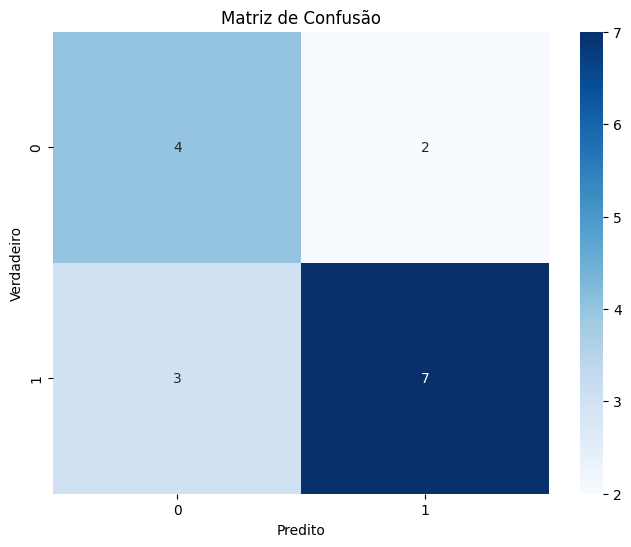

In [ ]:
# Convertendo X para um array numpy
X_stft = np.array(X_stft)

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_stft_train, X_stft_test, y_stft_train, y_stft_test = train_test_split(X_stft, y_stft, test_size=0.2, random_state=20)

# Inicializar o classificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Treinar o classificador
knn_classifier.fit(X_stft_train, y_stft_train)

# Prever as classes para o conjunto de teste
y_stft_pred = knn_classifier.predict(X_stft_test)

# Avaliar a precisão do classificador
accuracy_stft = accuracy_score(y_stft_test, y_stft_pred)
print("Acurácia do KNN:", accuracy_stft)

# Calcular a matriz de confusão
cm_stft = confusion_matrix(y_stft_test, y_stft_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stft, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

## RASTA-PLP

Acurácia do KNN com RASTA-PLP: 0.75


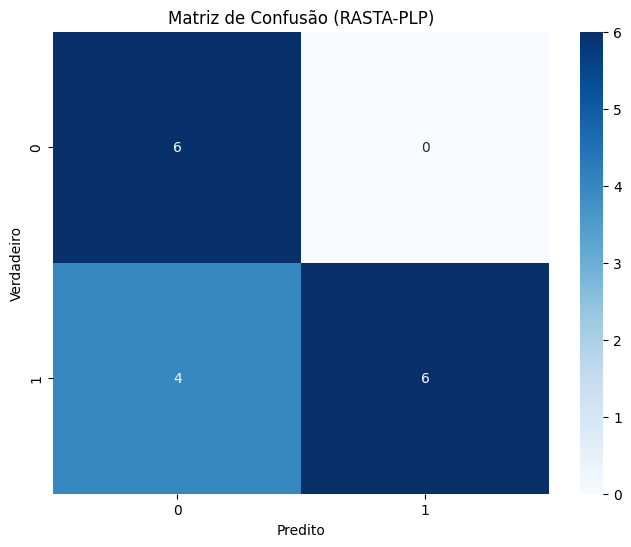

In [ ]:
# Convertendo X para um array numpy
X_rasta_plp = np.array(X_rasta_plp)

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_rasta_plp_train, X_rasta_plp_test, y_rasta_plp_train, y_rasta_plp_test = train_test_split(X_rasta_plp, y_rasta_plp, test_size=0.2, random_state=20)

# Inicializar o classificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=1)  # Pode ajustar o número de vizinhos (k) conforme necessário

# Treinar o classificador
knn_classifier.fit(X_rasta_plp_train, y_rasta_plp_train)

# Prever as classes para o conjunto de teste
y_rasta_plp_pred = knn_classifier.predict(X_rasta_plp_test)

# Avaliar a precisão do classificador
accuracy_rasta_plp = accuracy_score(y_rasta_plp_test, y_rasta_plp_pred)
print("Acurácia do KNN com RASTA-PLP:", accuracy_rasta_plp)

# Calcular a matriz de confusão
cm_rasta_plp = confusion_matrix(y_rasta_plp_test, y_rasta_plp_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rasta_plp, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (RASTA-PLP)')
plt.show()

## Greenwood Function Cepstral Coefficients - GFCC

Acurácia do KNN com GFCC: 0.8125


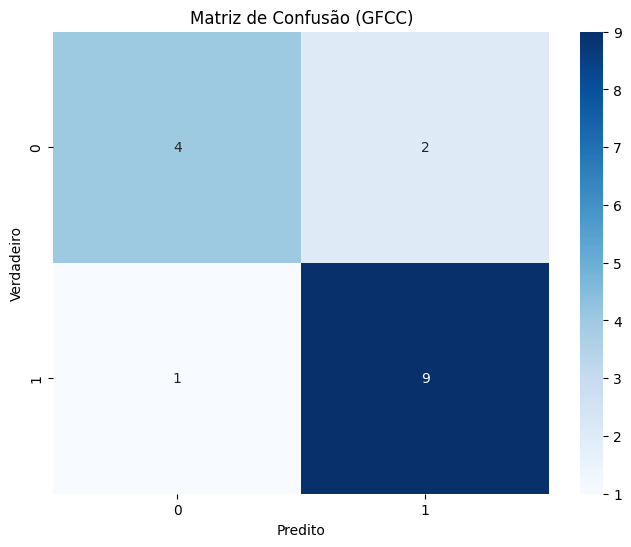

In [ ]:
# Convertendo X para um array numpy
X_gfcc = np.array(X_gfcc)

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_gfcc_train, X_gfcc_test, y_gfcc_train, y_gfcc_test = train_test_split(X_gfcc, y_gfcc, test_size=0.2, random_state=20)

# Inicializar o classificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=1)  # Pode ajustar o número de vizinhos (k) conforme necessário

# Treinar o classificador
knn_classifier.fit(X_gfcc_train, y_gfcc_train)

# Prever as classes para o conjunto de teste
y_gfcc_pred = knn_classifier.predict(X_gfcc_test)

# Avaliar a precisão do classificador
accuracy_gfcc = accuracy_score(y_gfcc_test, y_gfcc_pred)
print("Acurácia do KNN com GFCC:", accuracy_gfcc)

# Calcular a matriz de confusão
cm_gfcc = confusion_matrix(y_gfcc_test, y_gfcc_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gfcc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (GFCC)')
plt.show()

## Conclusão comparação de extratores

Com o uso de novos extratores que encontramos na literatura, em especial RASTA - PLP e GFCC, a acurácia geral passou para mais de 80%, em algumas categorias. O que nos proporcionou melhor desempenho com a solução do projeto.

Esse projeto já se mostrou eficaz no que se propõe, sendo 80% eficaz em reconhecer sons de cachorro e de gato. A eficácia poderia ser melhor com uma melhor exploração dos sinais.
